# Data loading 

In [0]:
import os
import pandas as pd
import numpy as np

data_root = os.path.join('.', 'data/emg_dataset')
print(data_root)

data_sub_folders = ['sub1', 'sub3', 'sub4']  # TODO include sub2
print(data_sub_folders)

agg_classes_dict = {
    "Elbowing": 0,
    "Frontkicking": 1,
    "Hamering": 2,
    "Headering": 3,
    "Kneeing": 4,
    "Pulling": 5,
    "Punching": 6,
    "Pushing": 7,
    "Sidekicking": 8,
    "Slapping": 9
}
norm_classes_dict = {
    "Bowing": 10,
    "Clapping": 11,
    "Handshaking": 12,
    "Hugging": 13,
    "Jumping": 14,
    "Running": 15,
    "Seating": 16,
    "Standing": 17,
    "Walking": 18,
    "Waving": 19
}
col_names = ['R-Bic', 'R-Tri', 'L-Bic', 'L-Tri', 'R-Thi', 'R-Ham', 'L-Thi', 'L-Ham']
col_dtypes = dict()
for col in col_names:
    col_dtypes[col] = np.int32

data_classes_files_dict = dict()

df = pd.DataFrame()

for type_, category_folder, category_dict in zip(["Aggressive", "Normal"], ["Aggressive/txt/", "Normal/txt/"],
                                                [agg_classes_dict, norm_classes_dict]):
    for cls, id in category_dict.items():
        for folder in data_sub_folders:
            txt_file = os.path.join(data_root, folder, category_folder, cls + '.txt')
            print("Processing txt_file: {}".format(txt_file))
            df_cur = pd.read_csv(txt_file, delim_whitespace=True,
                                 header=None,
                                 names=col_names,
                                 dtype=col_dtypes)
            df_cur = df_cur.assign(type=type_)
            df_cur = df_cur.assign(cls_id=id)
            df_cur = df_cur.assign(cls_name=cls)
            df_cur = df_cur.assign(sub_id=folder)
            df = df.append(df_cur, ignore_index=True, verify_integrity=True)
print(df)
df.to_pickle('emg_dataset_pandas_dataframe.pkl')

# Data visulisation

https://www.kaggle.com/kerneler/starter-soybean-price-factor-data-1962-7f5f06f9-2/notebook

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [21]:
! ls |

/bin/bash: -c: line 1: syntax error: unexpected end of file


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline
import seaborn; seaborn.set()


In [0]:
df = pd.read_pickle("emg_dataset_pandas_dataframe.pkl")

In [24]:
type(df)

pandas.core.frame.DataFrame

In [0]:
df.rename(columns={'R-Bic': 'RBic', 'R-Tri': 'RTri','L-Bic': 'LBic','L-Tri': 'LTri','R-Thi': 'RThi','L-Thi': 'LThi','R-Ham': 'RHam','L-Ham': 'LHam'}, inplace=True)

In [26]:
print(df.head(10))

   RBic  RTri  LBic  LTri  RThi  RHam  LThi  LHam        type  cls_id  \
0  -245   266  2615   -29 -4000  -549 -4000  4000  Aggressive       0   
1  -814   391   -22  -277 -4000  -130 -4000  4000  Aggressive       0   
2  -445   257 -3628  -428 -4000    97 -4000  4000  Aggressive       0   
3  -844   201 -4000  -498 -4000    62 -4000  4000  Aggressive       0   
4 -1996   233 -4000  -552 -4000   109 -4000  4000  Aggressive       0   
5 -3300   196 -4000  -538 -4000   185 -1989  4000  Aggressive       0   
6 -2838   294 -4000  -505  -918   205  -393  4000  Aggressive       0   
7 -1300   355 -4000  -438  3020   118  -542  4000  Aggressive       0   
8  -143   378 -1101  -397  4000    24  -538  4000  Aggressive       0   
9   717   252   528  -262  4000    17  1084  4000  Aggressive       0   

   cls_name sub_id   time_ms  
0  Elbowing   sub1  0.000000  
1  Elbowing   sub1  0.920999  
2  Elbowing   sub1  1.841998  
3  Elbowing   sub1  2.762996  
4  Elbowing   sub1  3.683995  
5  Elbowin

In [27]:
print(df.shape)

(597806, 13)


In [28]:
print(df.dtypes)

RBic          int32
RTri          int32
LBic          int32
LTri          int32
RThi          int32
RHam          int32
LThi          int32
LHam          int32
type         object
cls_id        int64
cls_name     object
sub_id       object
time_ms     float32
dtype: object


In [29]:
print(df.describe())

                RBic           RTri           LBic           LTri  \
count  597806.000000  597806.000000  597806.000000  597806.000000   
mean      -26.388379       7.457635     -14.416781      -4.676997   
std      1131.876288     670.492250    1146.275761     744.248648   
min     -4000.000000   -4000.000000   -4000.000000   -4000.000000   
25%      -179.000000     -64.000000    -133.000000     -71.000000   
50%       -12.000000       5.000000      -7.000000     -12.000000   
75%       122.000000      79.000000     100.000000      54.000000   
max      4000.000000    4000.000000    4000.000000    4000.000000   

                RThi           RHam           LThi           LHam  \
count  597806.000000  597806.000000  597806.000000  597806.000000   
mean       14.775857      30.856365      32.453967      18.393757   
std      2086.829565    1492.144862    1674.505710    1630.699008   
min     -4000.000000   -4000.000000   -4000.000000   -4000.000000   
25%      -441.000000    -219.0000

In [15]:
print(df.columns)

Index(['R-Bic', 'R-Tri', 'L-Bic', 'L-Tri', 'R-Thi', 'R-Ham', 'L-Thi', 'L-Ham',
       'type', 'cls_id', 'cls_name', 'sub_id', 'time_ms'],
      dtype='object')


In [4]:
class_counts = df.groupby('type').size()
print(class_counts)

type
Aggressive    300469
Normal        297337
dtype: int64


In [50]:
class_counts = df.groupby('sub_id').RBic.size()
print(class_counts)

sub_id
sub1    197058
sub3    204215
sub4    196533
Name: RBic, dtype: int64


In [0]:
df.hist(bins=100)

In [0]:
df.plot(kind='density', subplots=True, layout=(100,100), sharex=False)

## Vis. first case 

In [66]:
id0= df["cls_id"]==12
df[id0]
sub1= df["sub_id"]=="sub1"
df[sub1 & id0]
aggres= df["type"]=="Normal"
df[sub1 &  aggres & id0]



,RBic,RTri,LBic,LTri,RThi,RHam,LThi,LHam,type,cls_id,cls_name,sub_id,time_ms
361198,-66,6,1,-48,-17,-11,120,-60,Normal,12,Handshaking,sub1,0.000000
361199,-60,74,-27,-68,-14,25,119,-80,Normal,12,Handshaking,sub1,0.936427
361200,-119,25,-26,-66,-40,17,98,-54,Normal,12,Handshaking,sub1,1.872854
361201,-164,94,-8,-66,-36,31,95,-66,Normal,12,Handshaking,sub1,2.809281
361202,-183,124,-38,-54,-68,37,95,-47,Normal,12,Handshaking,sub1,3.745708
361203,-260,93,-26,-61,-51,22,77,-54,Normal,12,Handshaking,sub1,4.682135
361204,-461,13,-2,-33,-41,-11,85,-32,Normal,12,Handshaking,sub1,5.618562
361205,-559,-117,-7,-41,-31,16,105,-31,Normal,12,Handshaking,sub1,6.554989
361206,-477,-181,-13,-38,-22,27,97,-30,Normal,12,Handshaking,sub1,7.491416
361207,-279,-198,-1,-31,-33,0,102,-5,Normal,12,Handshaking,sub1,8.427843


In [94]:
print(plt.style.available)

['seaborn-dark-palette', 'seaborn-pastel', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-bright', 'fast', 'bmh', 'seaborn-notebook', 'seaborn-whitegrid', 'Solarize_Light2', 'seaborn-colorblind', 'seaborn-poster', 'seaborn-white', '_classic_test', 'classic', 'seaborn-ticks', 'seaborn-dark', 'ggplot', 'seaborn', 'fivethirtyeight', 'seaborn-paper', 'seaborn-talk', 'dark_background', 'grayscale']


In [0]:
plt.style.use("fivethirtyeight")

In [16]:
df.groupby(["sub_id","type","cls_name"]).plot(x='time_ms',subplots=True, legend=False)
plt.title("type")

In [8]:
for name , group in df.groupby(["sub_id","type","cls_name"]) :
  for column in group.columns : 
    if (column != "type" and column != "cls_id" and column != "cls_name" and column != "sub_id" and column != "time_ms"):
      group.plot(x='time_ms',y=column)
      plt.title(name)

In [1]:
for name , group in df.group(["sub_id","type","cls_name"]) :
  for column in group.columns : 
    if (column != "type" and column != "cls_id" and column != "cls_name" and column != "sub_id" and column != "time_ms"):
      group.plot(x='time_ms',y=column,kind="bar")
      plt.title(name)

NameError: ignored

In [9]:
fig, ax = plt.subplots()

for name , group in df.groupby(["sub_id","type","cls_name"]) :
  for column in group.columns : 
    if (column != "type" and column != "cls_id" and column != "cls_name" and column != "sub_id" and column != "time_ms"):
      group.hist(column=column,bins=100,figsize=(12, 12))
      plt.text(1, 1, column)

      plt.title(name)


In [10]:
for name , group in df.groupby(["sub_id","type","cls_name"]) :
  for column in group.columns : 
    if (column != "type" and column != "cls_id" and column != "cls_name" and column != "sub_id" and column != "time_ms"):
      group.plot(kind='kde',x='time_ms',y=column)
      plt.title(name)

In [7]:
for name , group in df.groupby(["sub_id","type","cls_name"]) :
  for column in group.columns : 
    if (column != "type" and column != "cls_id" and column != "cls_name" and column != "sub_id" and column != "time_ms"):
      group.plot(x='time_ms',y=column,style='k.')
      plt.title(name)

In [51]:
for name , group in df.groupby(["sub_id","type","cls_name"]) :
  for column in group.columns : 
    if (column != "type" and column != "cls_id" and column != "cls_name" and column != "sub_id" and column != "time_ms"):
      fig, ax = plt.subplots()
      group.boxplot(column = column)
      plt.title(name)

In [49]:
from pandas.tools.plotting import lag_plot

for name , group in df.groupby(["sub_id","type","cls_name"]) :
  for column in group.columns : 
    if (column != "type" and column != "cls_id" and column != "cls_name" and column != "sub_id" and column != "time_ms"):
  #       print(column)
      fig, ax = plt.subplots()
      lag_plot(getattr(group,column),ax=ax)
      fig.tight_layout()
      plt.title(name)

In [7]:
from pandas.tools.plotting import autocorrelation_plot

for name , group in df.groupby(["sub_id","type","cls_name"]) :
  for column in group.columns : 
    if (column != "type" and column != "cls_id" and column != "cls_name" and column != "sub_id" and column != "time_ms"):
  #       print(column)
      fig, ax = plt.subplots()
      autocorrelation_plot(getattr(group,column),ax=ax)
      fig.tight_layout()
      plt.title(name)

Text(0,0.5,'R-Tri')

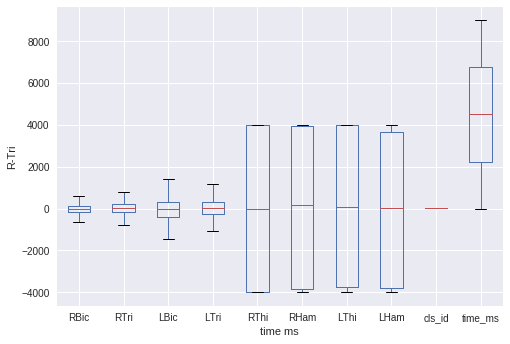

In [9]:
id0= df["cls_id"]==8
df[id0]
sub1= df["sub_id"]=="sub1"
df[sub1 & id0]
aggres= df["type"]=="c"
df[sub1 &  aggres & id0]

ax= df[sub1 & id0 & aggres].boxplot()
ax.set_xlabel("time ms")
ax.set_ylabel("R-Tri")

In [18]:
from pandas.tools.plotting import lag_plot

id0= df["cls_id"]==8
df[id0]
sub1= df["sub_id"]=="sub1"
df[sub1 & id0]
aggres= df["type"]=="Aggressive"
df[sub1 &  aggres & id0]

ax= df[sub1 & id0 & aggres]
plt.matshow(np.reshape(ax.RTri, (-1, 2)))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


ValueError: ignored

Text(0,0.5,'R-Tri')

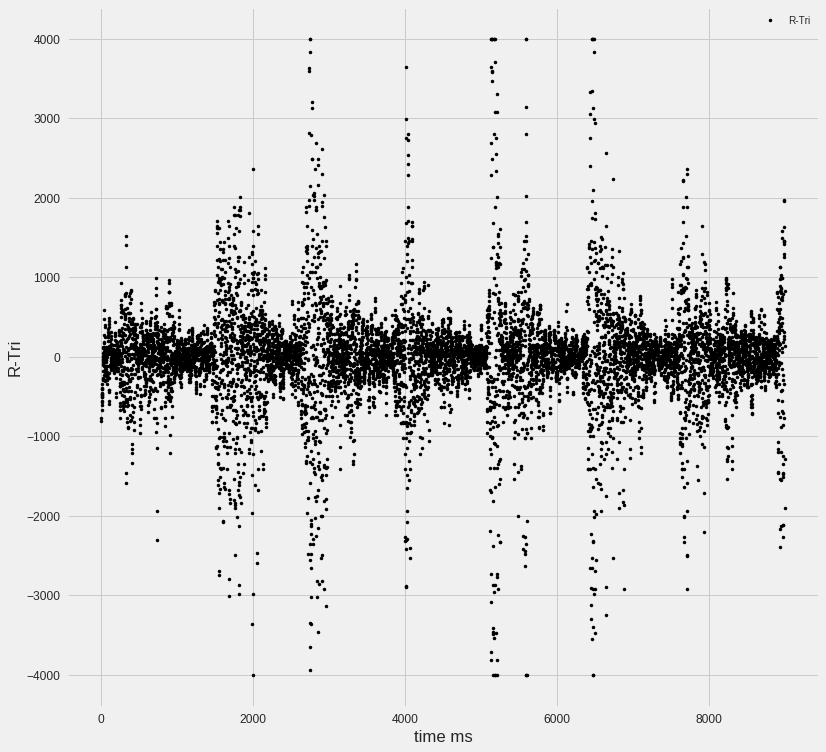

In [103]:
id0= df["cls_id"]==8
df[id0]
sub1= df["sub_id"]=="sub1"
df[sub1 & id0]
aggres= df["type"]=="Aggressive"
df[sub1 &  aggres & id0]

ax= df[sub1 & id0 & aggres].plot(x='time_ms', y='R-Tri',figsize=(12, 12),fontsize=12,linewidth=3,style='k.')
ax.set_xlabel("time ms")
ax.set_ylabel("R-Tri")

Text(0,0.5,'RTri')

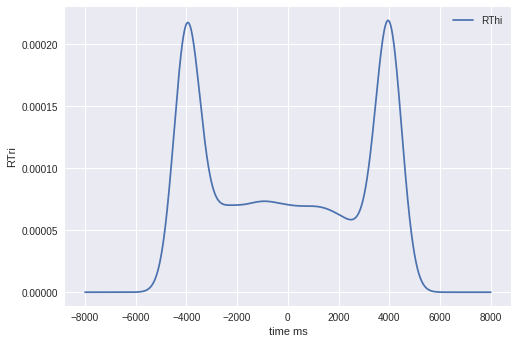

In [28]:
id0= df["cls_id"]==0
df[id0]
sub1= df["sub_id"]=="sub1"
df[sub1 & id0]
aggres= df["type"]=="Aggressive"
df[sub1 &  aggres & id0]

ax= df[sub1 & id0 & aggres].plot(kind='kde',x='time_ms', y='RThi')
ax.set_xlabel("time ms")
ax.set_ylabel("RTri")

In [0]:
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


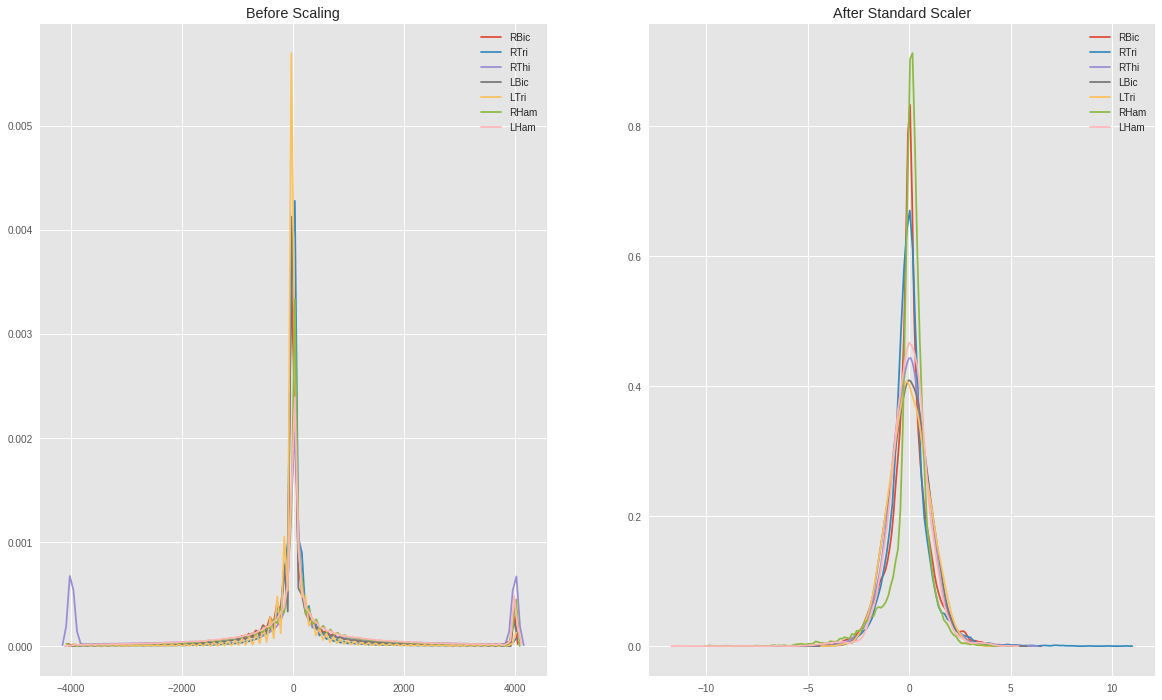

In [83]:

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform( df[df.columns[:8]].values[361198:370808])

scaled_df = pd.DataFrame(scaled_df, columns=['RBic', 'RTri', 'LBic', 'LTri', 'RThi', 'RHam', 'LThi', 'LHam'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 12))

ax1.set_title('Before Scaling')
sns.kdeplot(df['RBic'], ax=ax1)
sns.kdeplot(df['RTri'], ax=ax1)
sns.kdeplot(df['RThi'], ax=ax1)
sns.kdeplot(df['LBic'], ax=ax1)
sns.kdeplot(df['LTri'], ax=ax1)
sns.kdeplot(df['RHam'], ax=ax1)
sns.kdeplot(df['LHam'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['RBic'], ax=ax2)
sns.kdeplot(scaled_df['RTri'], ax=ax2)
sns.kdeplot(scaled_df['RThi'], ax=ax2)
sns.kdeplot(scaled_df['LBic'], ax=ax2)
sns.kdeplot(scaled_df['LTri'], ax=ax2)
sns.kdeplot(scaled_df['RHam'], ax=ax2)
sns.kdeplot(scaled_df['LHam'], ax=ax2)


plt.show()

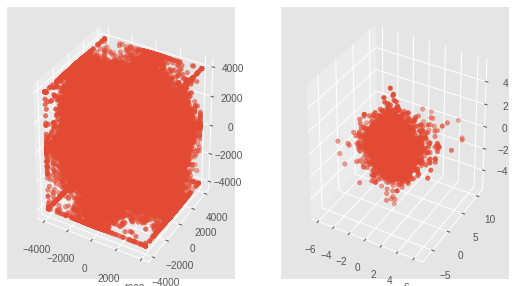

In [84]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['RBic'],df['RTri'], df['LBic'])#, df['LTri'], df['RThi'], df['RHam'], df['LThi'], df['LHam'])
ax2.scatter(scaled_df['RBic'], scaled_df['RTri'], scaled_df['LBic'])#, scaled_df['LTri'], scaled_df['RThi'], scaled_df['RHam'], scaled_df['LThi'], scaled_df['LHam'])
plt.show()

In [34]:
 df[sub1 & id0 & aggres]["RThi"].reshape(-1, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[-4000],
       [-4000],
       [-4000],
       ...,
       [ 1032],
       [ 2363],
       [ 2363]], dtype=int32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0      -4000
1      -4000
2      -4000
3      -4000
4      -4000
5      -4000
6       -918
7       3020
8       4000
9       4000
10      4000
11      4000
12      4000
13      4000
14      4000
15      4000
16      4000
17      4000
18      4000
19      4000
20      4000
21      4000
22      4000
23      4000
24      3672
25      2123
26     -2057
27     -4000
28     -4000
29     -4000
        ... 
9742    4000
9743    4000
9744    4000
9745    4000
9746    4000
9747    4000
9748    4000
9749    4000
9750    4000
9751    4000
9752    4000
9753    4000
9754    4000
9755    4000
9756    4000
9757    4000
9758    4000
9759    4000
9760    4000
9761    4000
9762    3851
9763    3213
9764    2947
9765    2710
9766    1710
9767     692
9768     600
9769    1032
9770    2363
9771    2363
Name: RThi, Length: 9772, dtype: int32

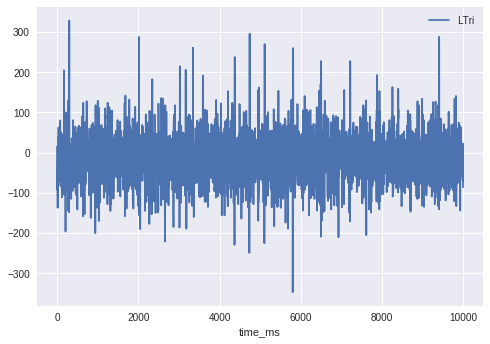

In [13]:
df[sub1 & id0 & aggres].plot(x='time_ms', y='LTri')

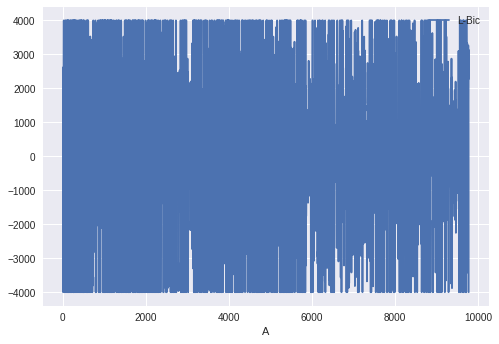

In [65]:
df[sub1 & id0 & aggres].plot(x='A', y='L-Bic')

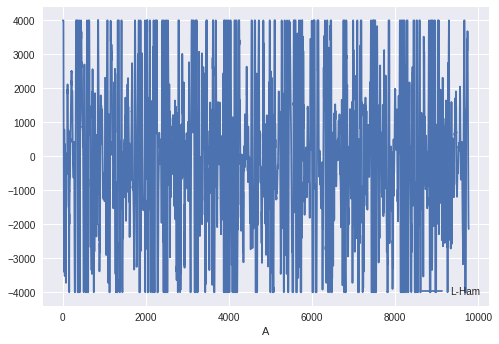

In [66]:
df[sub1 & id0 & aggres].plot(x='A', y='L-Ham')

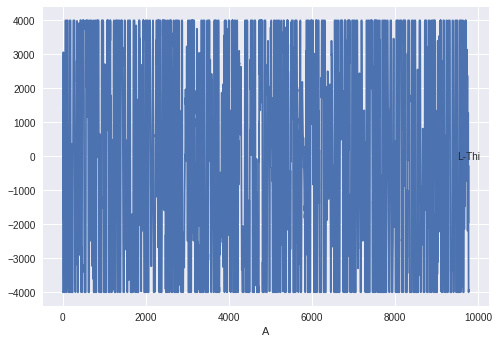

In [67]:
df[sub1 & id0 & aggres].plot(x='A', y='L-Thi')

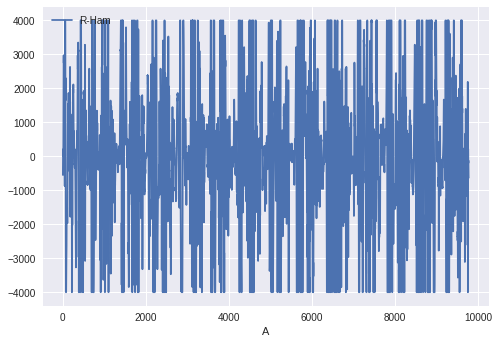

In [68]:
df[sub1 & id0 & aggres].plot(x='A', y='R-Ham')

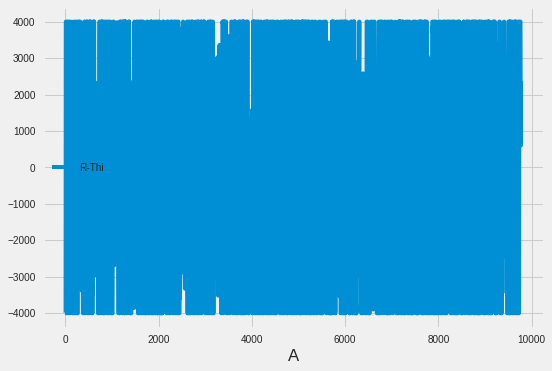

In [72]:
df[sub1 & id0 & aggres].plot(x='A', y='R-Thi')

# Signal and data pre-processing 

## FFT 

## Low pass Filter 

## LDA - Linear discriminant analysis

# Models

## Unsupervised models 

### Autoencoder

### K-mean clustring for anomaly detection 

### Markov Chain

### Isolation Forest

### SVM

### RNN 